In [1]:
import os
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import seed
from scipy.stats import norm
from scipy.stats import t
from sklearn.preprocessing import StandardScaler

from matplotlib import rcParams
sns.set(style="darkgrid")
sns.set_context("poster")


In [2]:
df=pd.read_csv("tic_2000_eval_data.csv")

In [3]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,5.787000,0.706750,4.653250,1.021250,3.269500,6.197000,...,0.084500,0.003500,0.010000,0.00375,0.579750,0.001500,0.003750,0.031000,0.009250,0.013250
std,13.022822,0.42108,0.767306,0.790025,2.899609,1.032241,1.729093,1.001274,1.618958,1.876585,...,0.394206,0.059065,0.099511,0.06113,0.560106,0.038706,0.072369,0.206276,0.095743,0.114358
min,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,3.000000,0.000000,4.000000,0.000000,2.000000,5.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,7.000000,0.000000,5.000000,1.000000,3.000000,6.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,8.000000,1.000000,6.000000,2.000000,4.000000,7.000000,...,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,10.000000,9.000000,9.000000,5.000000,9.000000,9.000000,...,5.000000,1.000000,1.000000,1.00000,6.000000,1.000000,2.000000,4.000000,1.000000,1.000000


In [4]:
df.keys()

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS',

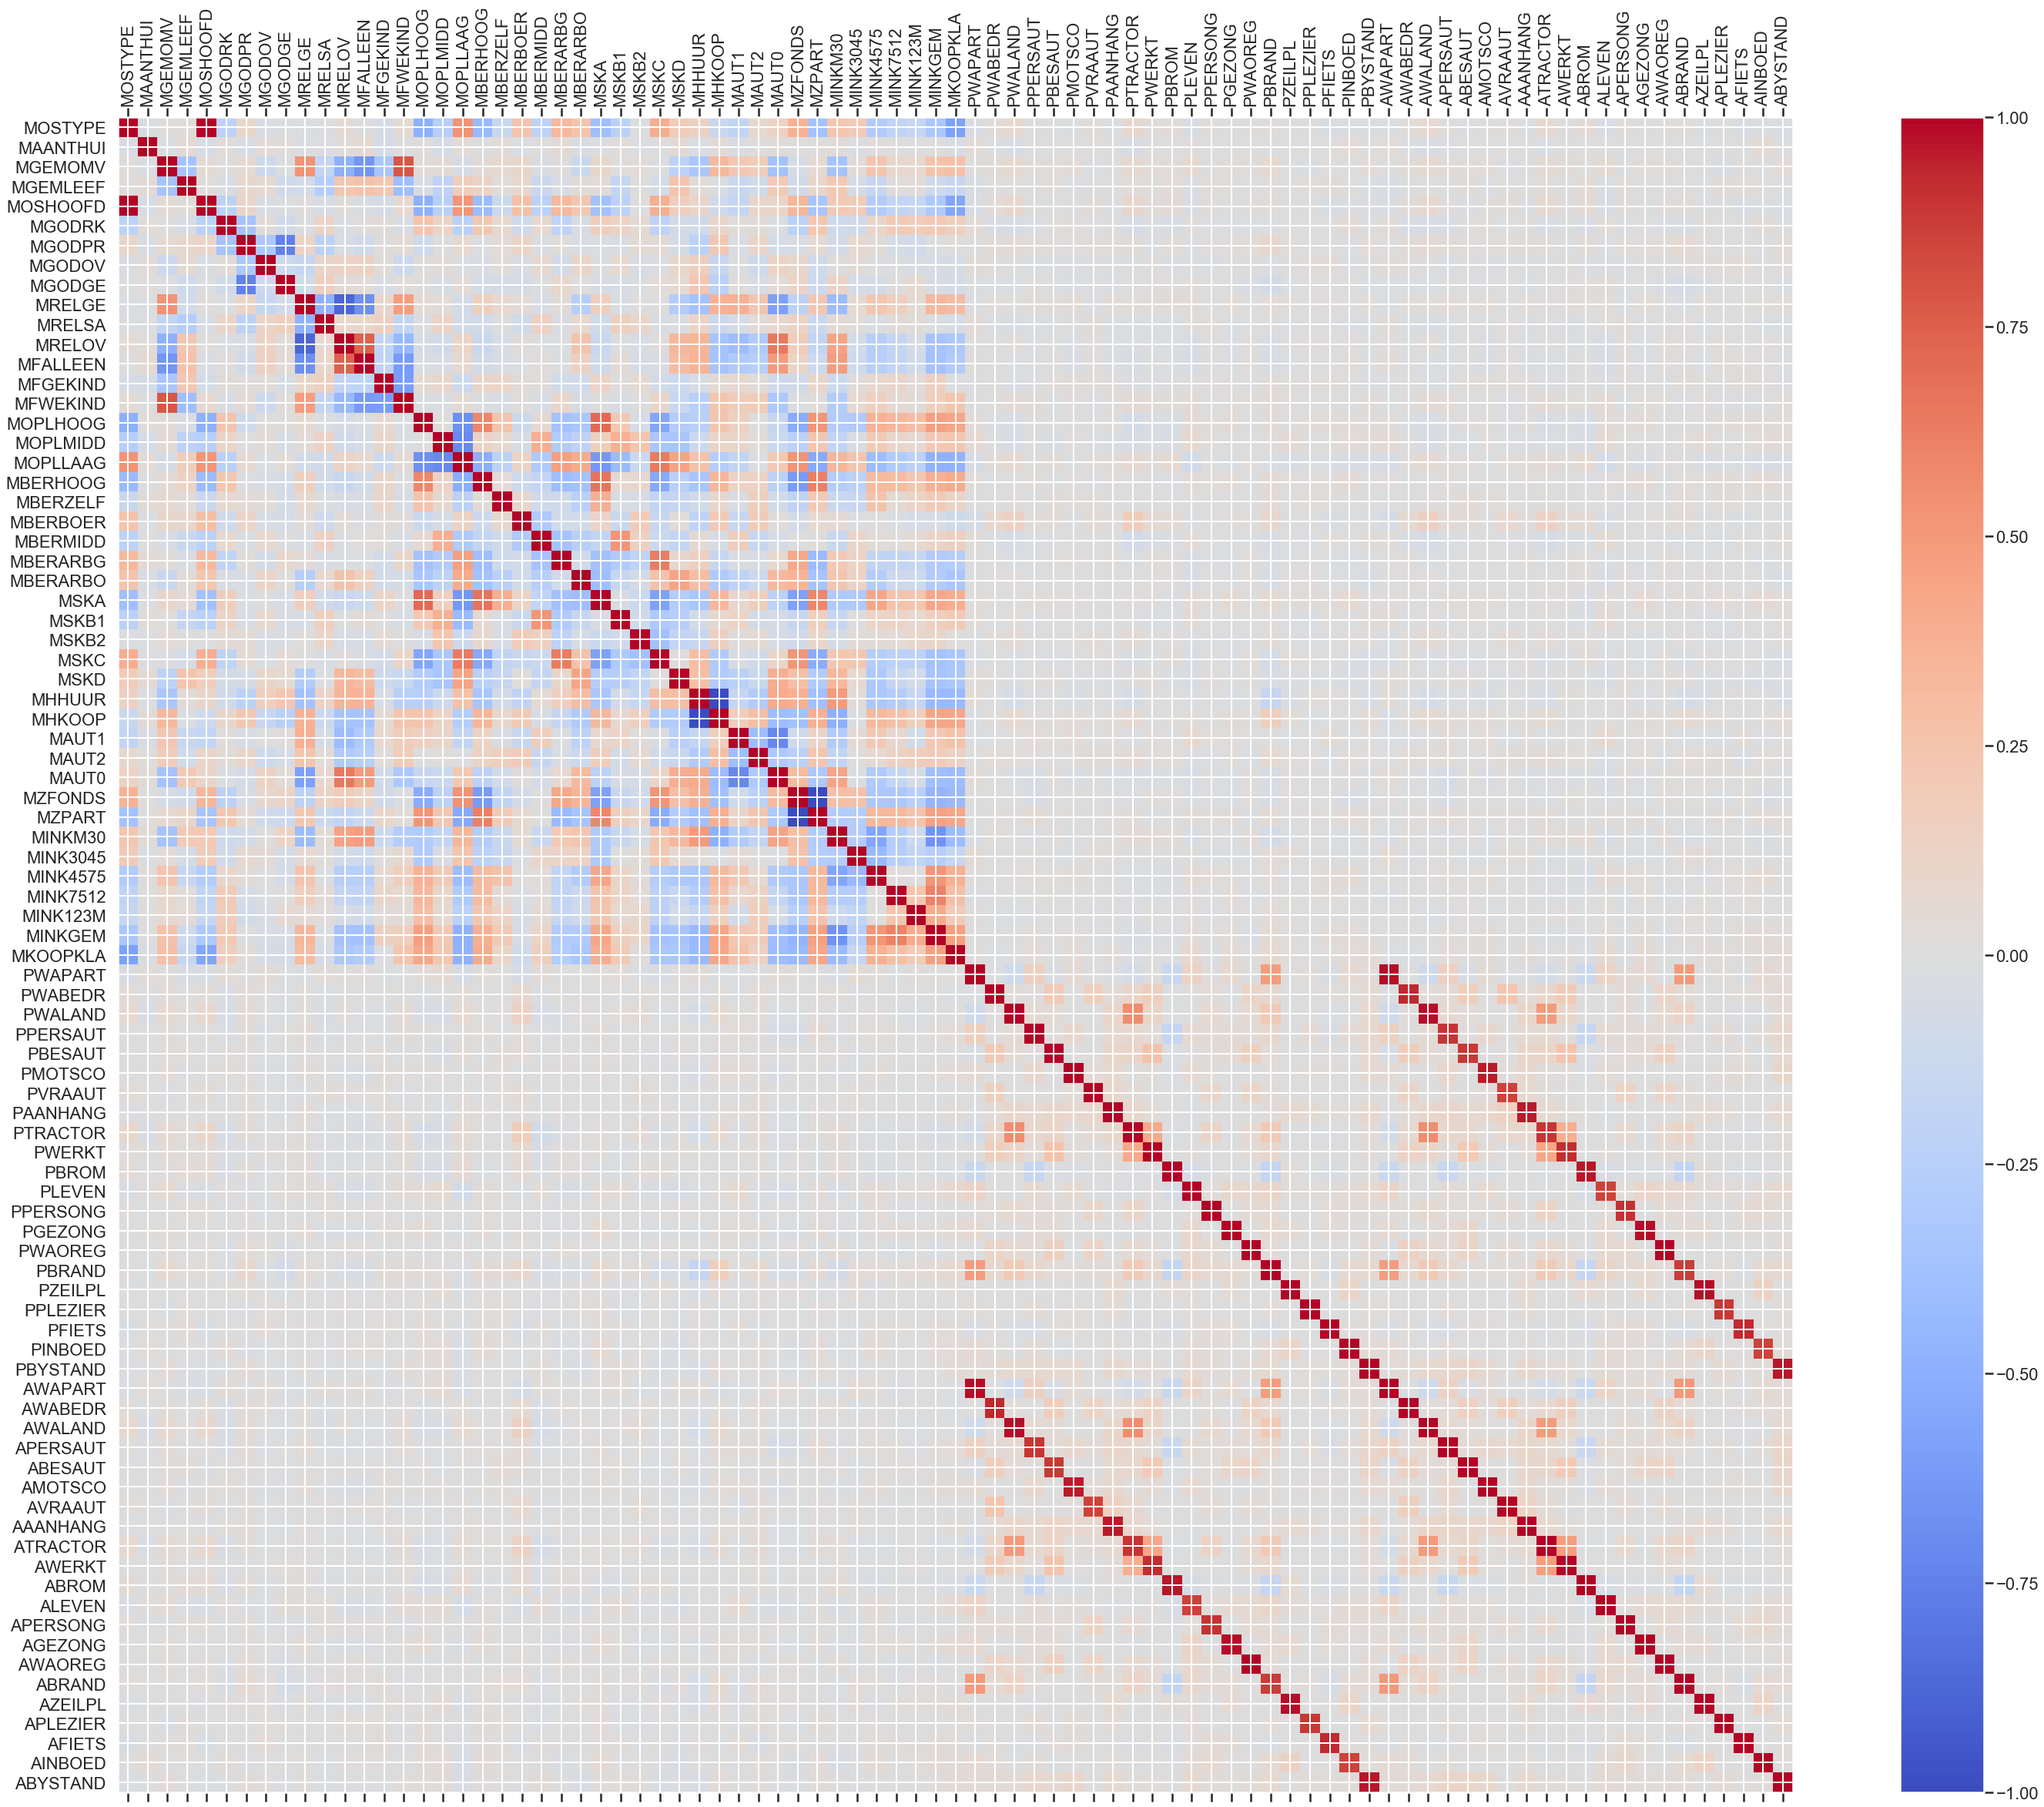

In [5]:
corr = df.corr()
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [8]:
#Drop highly correlated features to get better view of correlation.
# Create correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.70)]

# Drop features 
df.drop(to_drop, axis=1, inplace=True)

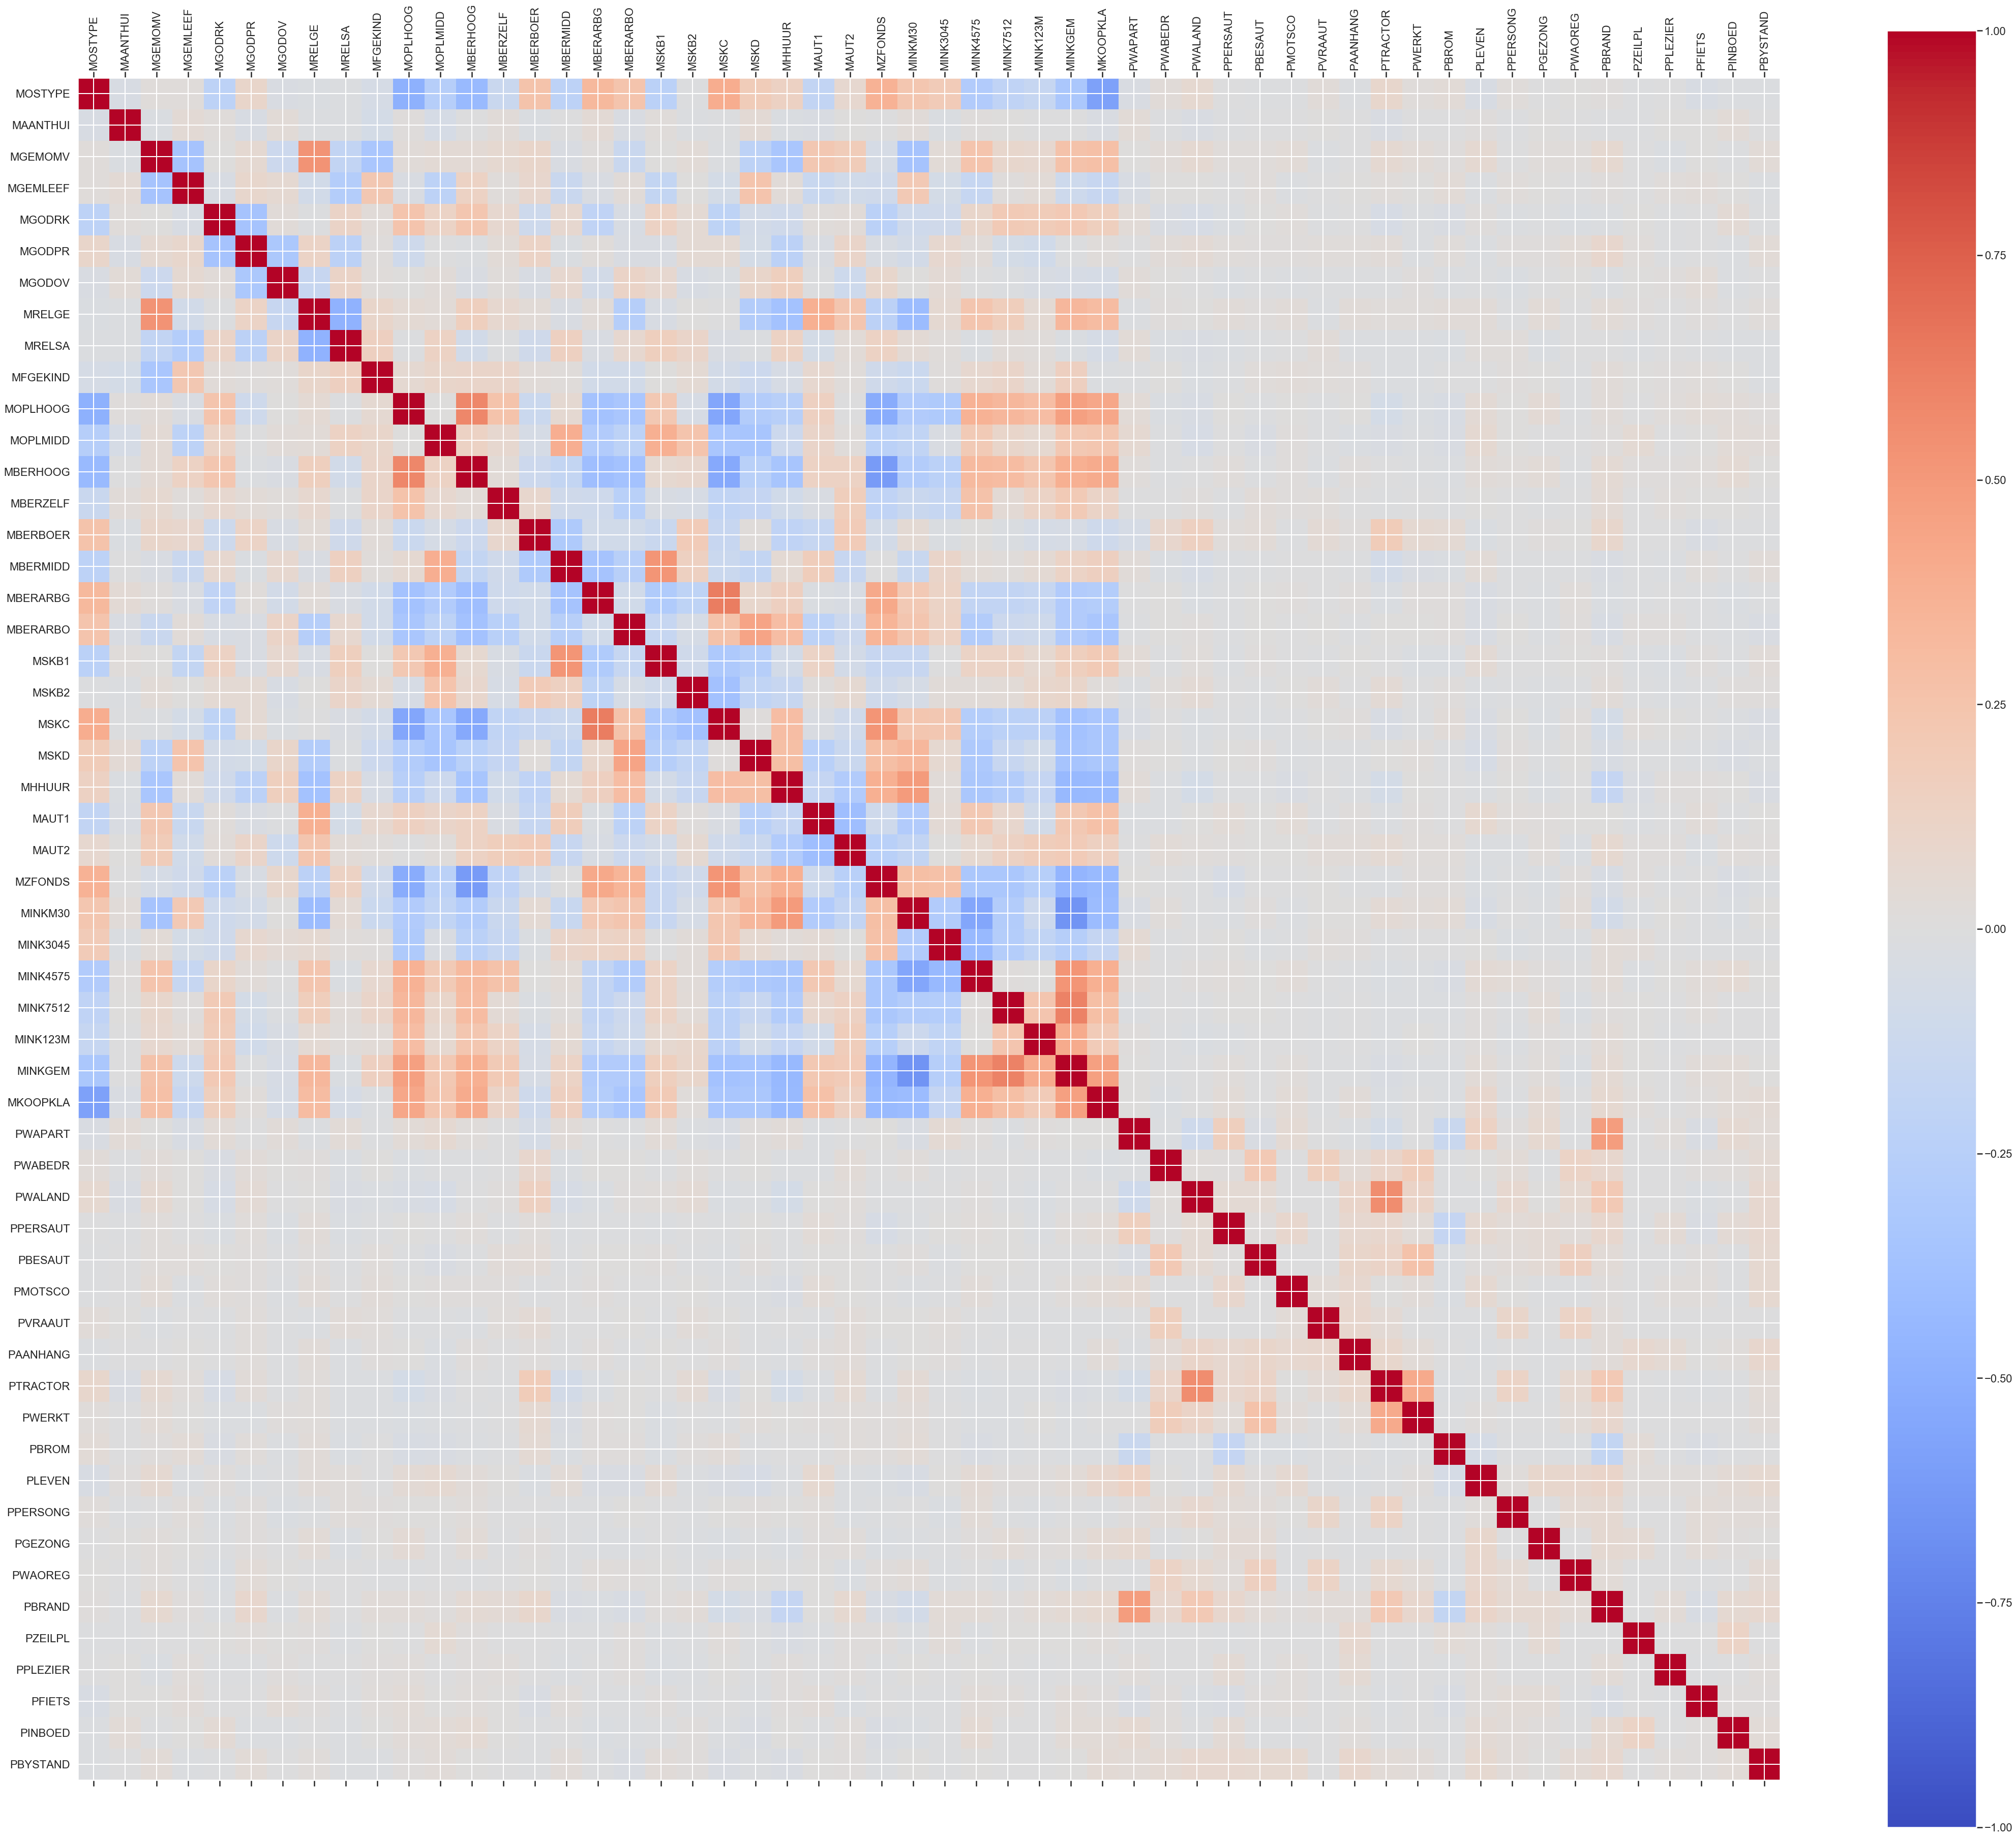

In [9]:
corr = df.corr()
fig = plt.figure(figsize=(50,40))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

In [10]:
#Dropped variables
print(to_drop)

['MOSHOOFD', 'MGODGE', 'MRELOV', 'MFALLEEN', 'MFWEKIND', 'MOPLLAAG', 'MSKA', 'MHKOOP', 'MAUT0', 'MZPART', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT', 'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM', 'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL', 'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND']


In [11]:
df.corr()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,MFGEKIND,...,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND
MOSTYPE,1.000000,-0.042559,0.016170,0.021801,-0.216328,0.095448,-0.034510,-0.028429,-0.023304,-0.060574,...,-0.040657,0.017298,-0.007007,0.006224,0.014437,-0.013466,-0.002576,-0.044919,-0.019746,-0.021531
MAANTHUI,-0.042559,1.000000,-0.025167,0.046082,0.018604,-0.040863,0.031429,-0.016306,-0.016021,-0.065573,...,0.009327,-0.013497,0.002289,-0.005934,-0.010889,-0.009562,0.002318,0.000708,0.038290,-0.006136
MGEMOMV,0.016170,-0.025167,1.000000,-0.357985,0.003995,0.059609,-0.120571,0.525945,-0.182767,-0.329498,...,0.059878,-0.000635,0.017296,0.019815,0.062908,-0.001950,-0.025157,0.004286,-0.007852,0.035099
MGEMLEEF,0.021801,0.046082,-0.357985,1.000000,-0.039957,0.088884,0.059956,-0.085373,-0.272380,0.226071,...,-0.022300,0.018238,0.000813,-0.005368,0.010737,-0.004563,0.015997,0.025281,0.005306,-0.017276
MGODRK,-0.216328,0.018604,0.003995,-0.039957,1.000000,-0.356667,0.025870,-0.010188,0.113373,0.026351,...,0.009952,-0.019396,-0.008175,-0.026464,-0.023221,0.007446,-0.009045,-0.001673,0.044253,-0.010514
MGODPR,0.095448,-0.040863,0.059609,0.088884,-0.356667,1.000000,-0.319570,0.124403,-0.222052,0.013005,...,-0.015923,0.015450,0.013753,0.038475,0.084054,0.019600,-0.008267,-0.006083,-0.020063,0.031535
MGODOV,-0.034510,0.031429,-0.120571,0.059956,0.025870,-0.319570,1.000000,-0.148621,0.114955,0.023035,...,-0.015367,-0.025478,-0.001055,0.000695,-0.020267,0.002643,0.009171,0.036169,-0.022074,-0.000390
MRELGE,-0.028429,-0.016306,0.525945,-0.085373,-0.010188,0.124403,-0.148621,1.000000,-0.477242,0.094666,...,0.030996,-0.014287,0.033851,-0.004302,0.038603,0.012574,-0.001287,0.010908,-0.002037,0.018892
MRELSA,-0.023304,-0.016021,-0.182767,-0.272380,0.113373,-0.222052,0.114955,-0.477242,1.000000,0.151277,...,0.016938,0.021559,-0.024405,-0.002742,-0.005774,-0.019642,-0.001773,-0.012469,-0.016121,-0.022096
MFGEKIND,-0.060574,-0.065573,-0.329498,0.226071,0.026351,0.013005,0.023035,0.094666,0.151277,1.000000,...,-0.006274,0.014105,0.000968,-0.010352,0.025642,0.007103,0.009753,0.022651,0.001371,-0.017329


In [12]:
df.describe()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MGODRK,MGODPR,MGODOV,MRELGE,MRELSA,MFGEKIND,...,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND
count,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,24.253000,1.10600,2.675750,3.004000,0.706750,4.653250,1.021250,6.197000,0.858000,3.247500,...,0.213250,0.008250,0.023750,0.023000,1.881000,0.002750,0.010000,0.025500,0.018250,0.042250
std,13.022822,0.42108,0.767306,0.790025,1.032241,1.729093,1.001274,1.876585,0.956067,1.593386,...,0.928434,0.153909,0.241248,0.375508,1.883939,0.072414,0.194704,0.157658,0.221199,0.378815
min,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,1.00000,2.000000,3.000000,0.000000,4.000000,0.000000,5.000000,0.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,30.000000,1.00000,3.000000,3.000000,0.000000,5.000000,1.000000,6.000000,1.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,35.000000,1.00000,3.000000,3.000000,1.000000,6.000000,2.000000,7.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,41.000000,10.00000,6.000000,6.000000,9.000000,9.000000,5.000000,9.000000,7.000000,9.000000,...,7.000000,5.000000,3.000000,7.000000,8.000000,2.000000,5.000000,1.000000,6.000000,5.000000


In [20]:
# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# summarize the dataset
print(X.shape, y.shape)

(1000, 20) (1000,)


In [21]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.864 (0.042)
